In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
#Import Dataframe
df_WorldEvents = pd.read_csv('./WorldImportantDates.csv')

# Size of df
print('Size of df_WorldEvents : ' + str(df_WorldEvents.shape))

display(df_WorldEvents.sample(5))

Size of df_WorldEvents : (1096, 12)


,Sl. No,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
151,166,Invention of Printing Technology,Unknown,Unknown,650,China,Scientific,China,Pioneered the use of woodblock and movable typ...,Global population,Chinese inventors,Positive
647,685,Tech Boom and DotUnknowncom Bubble,,Unknown,1990,USA,Economic,"Silicon Valley, CA","Rapid growth in tech industry, followed by a m...","Tech companies, investors","Tech entrepreneurs, investors",Mixed
157,172,Boxer Rebellion,Unknown,Unknown,1900,China,AntiUnknownImperialist Uprising,Northern China,An antiUnknownforeigner movement that aimed to...,"Foreigners, Chinese Christians",Boxer militants,Negative
645,683,Stonewall Riots,28,June,1969,USA,Social Movement,"New York, NY",Marked the beginning of the modern LGBTQ+ righ...,LGBTQ+ community,"LGBTQ+ activists, police",Positive
978,1034,Independence from France,2,October,1958,Guinea,Independence,Guinea,First French African colony to gain independen...,Guineans,Ahmed Sékou Touré,Positive


In [265]:
#Clean the data

#Drop useless column
df_clean = df_WorldEvents.drop('Sl. No', axis=1)

#Change Year column into int
df_clean['Year'] = pd.to_numeric(df_clean['Year'], errors='coerce')

#Drop NaN created for years "BC" (we are not interested in events that took place before christ)
df_clean.dropna(subset=['Year'], inplace=True)

#Int type
df_clean['Year'] = df_clean['Year'].astype(int)


#Replace "Unknown" by "-" for the right columns as it seems not recognized
text_columns = ['Name of Incident', 'Country',	'Type of Event', 'Place Name',	'Impact', 'Affected Population', 'Important Person/Group Responsible']
for col in text_columns:
    df_clean[col] = df_clean[col].apply(lambda s : str(s).replace('Unknown', '-'))

#Check we have no more NaN values
print("Count of NaN: ")
print(df_clean.isnull().sum()) # It already had no Nan values (No more NaN values indeed)


#Sort by Year
df_short = df_clean.sort_values('Year')

# Select only years that could impact the Movie Dataset (which has dates from 1897 to 2012)
start = 1895 # A bit before the first movie of the Movie Dataset could be intresting such as 1880
end = 2012
df_short = df_short[df_short['Year'] > start-1]
df_short = df_short[df_short['Year'] < end+1]

#Reset the index
df_short.reset_index(drop=True, inplace=True)

df = df_short
print('After having filtered according to the time period of intrest we get a dataframe of shape:', df.shape) 


Count of NaN: 
Name of Incident                      0
Date                                  0
Month                                 0
Year                                  0
Country                               0
Type of Event                         0
Place Name                            0
Impact                                0
Affected Population                   0
Important Person/Group Responsible    0
Outcome                               0
dtype: int64
After having filtered according to the time period of intrest we get a dataframe of shape: (669, 11)


In [258]:
val = 100 * (df.shape[0] / df_WorldEvents.shape[0])
print(f"We are using {val:.2f}% of the full World Events dataframe.")
print('The dataframe still has events from any country in the world')

We are using 61.04% of the full World Events dataframe.
The dataframe still has events from any country in the world


In [259]:
print("We end up with the resulting dataframe :")
display(df.head(3))
print("...")
display(df.tail(3))

We end up with the resulting dataframe :


,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
0,Federated Malay States Formed,Unknown,Unknown,1895,Malaya,Colonial Administration,Peninsular,British establishment of federated administrat...,Malay states people,British Colonial Administration,Negative
1,Assassination of Empress Myeongseong,8,October,1895,Korea,Political Assassination,Gyeongbokgung Palace,The Japanese-orchestrated assassination height...,"Korean royal family, citizens",Japanese agents,Negative
2,Klondike Gold Rush,,Unknown,1896,Canada,Economic,Yukon,Attracted thousands of prospectors to the Yuko...,"Prospectors, Indigenous peoples",-,Positive


...


,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
666,Hurricane Sandy,29,October,2012,USA,Natural Disaster,East Coast,Devastating hurricane causing extensive damage...,East Coast residents,"Local governments, relief efforts",Negative
667,2012 London Olympics,27,July,2012,UK,Sporting Event,London,Showcased UK on global stage and boosted economy,UK and global visitors,International Olympic Committee,Positive
668,Coup d'état,22,March,2012,Mali,Coup,"Bamako, Mali","Military coup overthrew the government, leadin...",Malians,"Malian soldiers, Amadou Sanogo",Negative


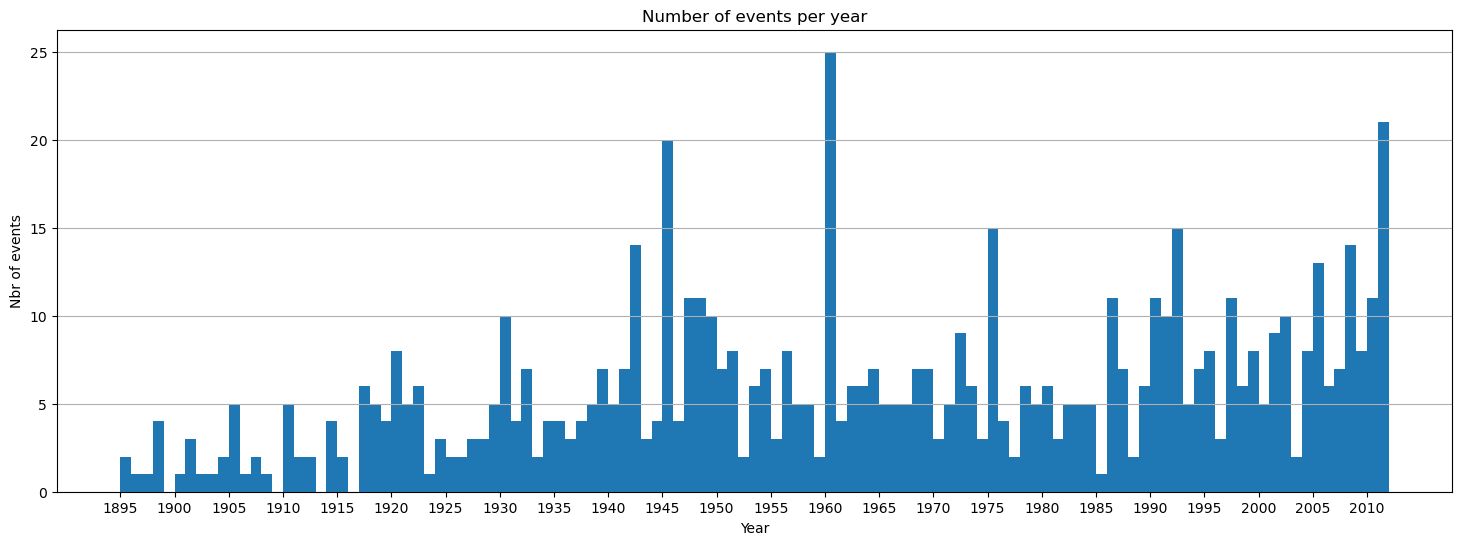

In [260]:
#Lets try to visualize a bit our data
#Histogram of the year
plt.figure(figsize=(18,6))
plt.hist(df['Year'], bins=end-start) # one bin for every year
plt.title('Number of events per year')
plt.xlabel('Year')
plt.ylabel('Nbr of events')

year_ticks = np.arange(start, end + 1, 5)  # Adjust the interval to 5 years instead of the default 20 years
plt.xticks(year_ticks)

plt.grid(axis='y')


Number of different countries: 103


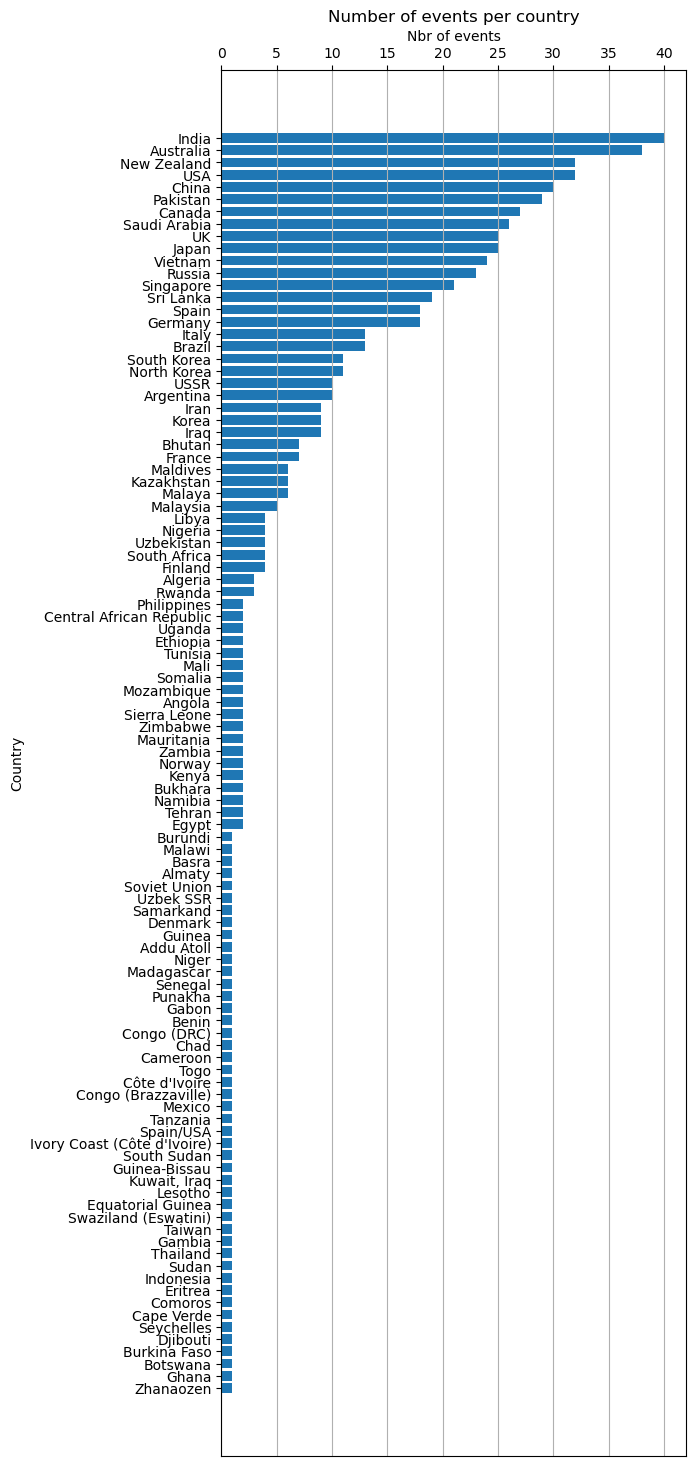

In [274]:
plt.figure(figsize=(6,18))

country_counts = df['Country'].value_counts().sort_values(ascending=True)

plt.barh(country_counts.index, country_counts.values)# one bin for every year
plt.title('Number of events per country')
plt.ylabel('Country')
plt.xlabel('Nbr of events')

plt.gca().xaxis.tick_top() # Move ticks to the top
plt.gca().xaxis.set_label_position('top') # Move the x-axis label to the top

plt.grid(axis='x')

print('Number of different countries:', len(df['Country'].unique()))
### Note that some of the 'countries' with only one event are sometimes just differently labelled (e.g 'Russia'-'USSR'-'Soviet Union', 'Korea'-'South Korea'-'North Korea', 'USA/Spain', 'Kuwait, Iraq')

Number of different types of events: 262


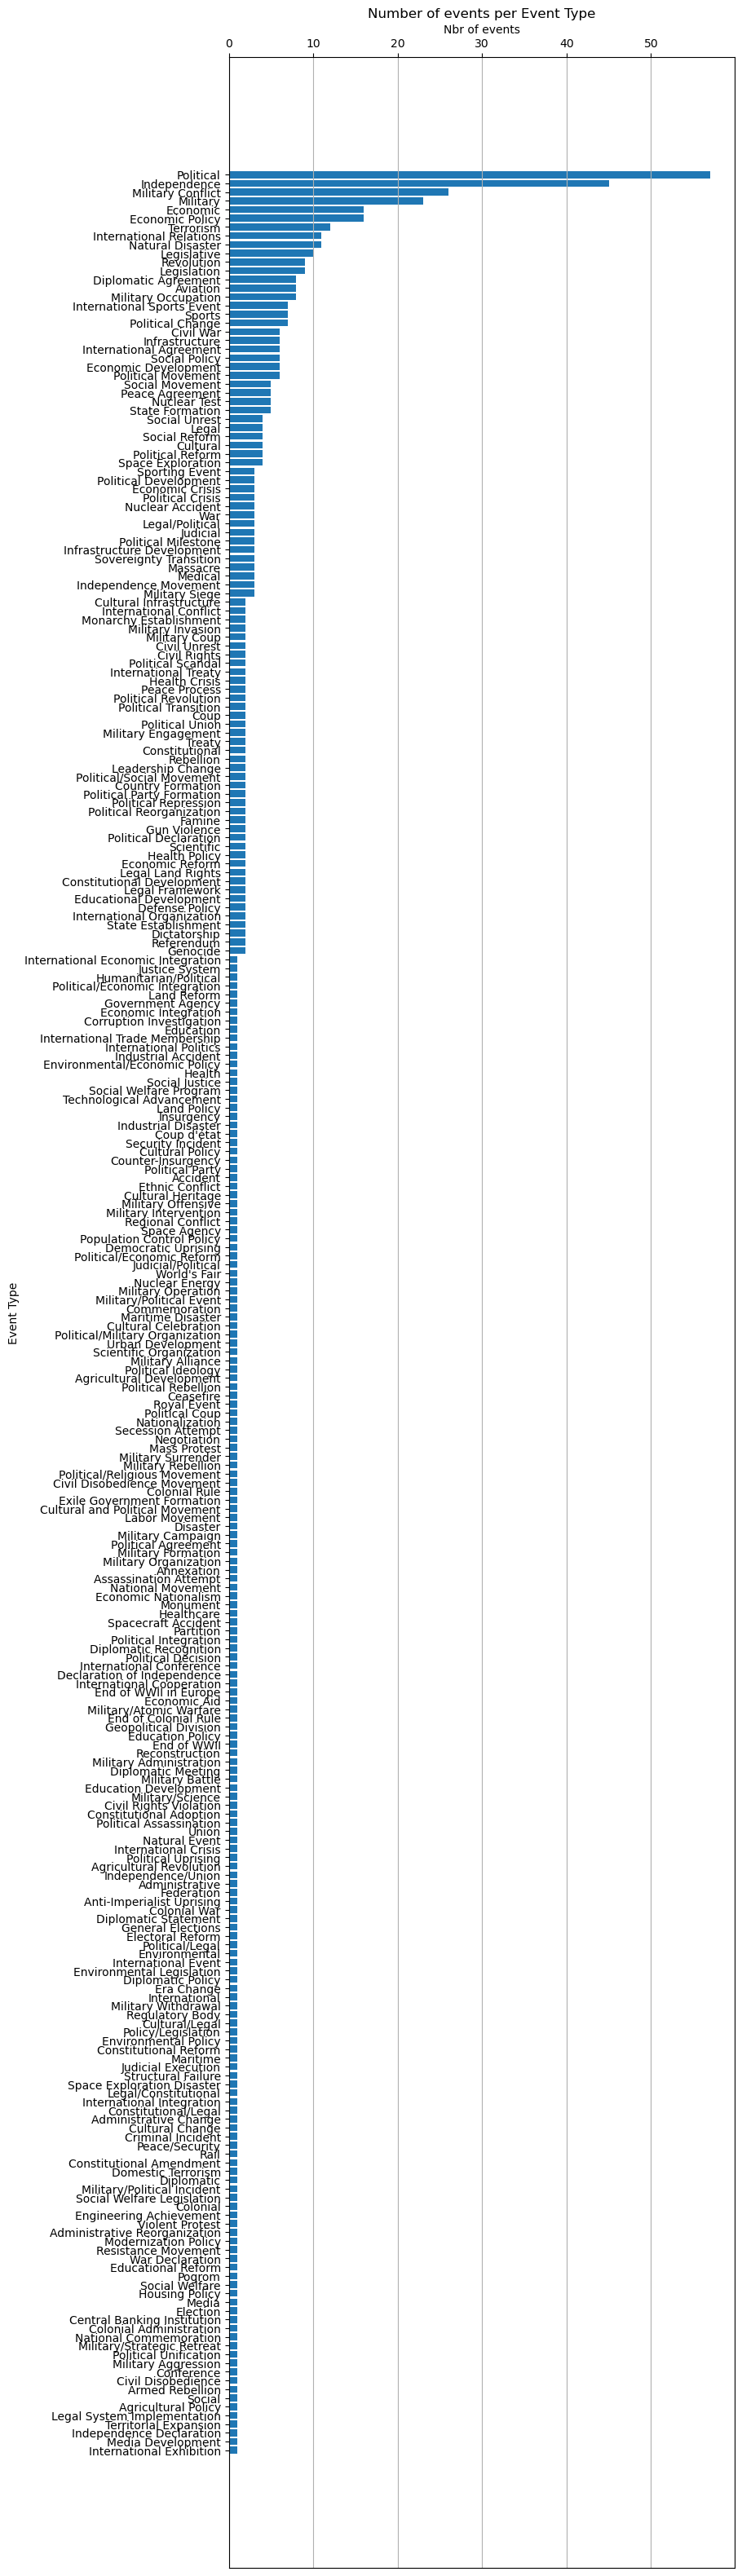

In [275]:
plt.figure(figsize=(8,40))

event_counts = df['Type of Event'].value_counts().sort_values(ascending=True)

plt.barh(event_counts.index, event_counts.values)# one bin for every year
plt.title('Number of events per Event Type')
plt.ylabel('Event Type')
plt.xlabel('Nbr of events')

plt.gca().xaxis.tick_top() # Move ticks to the top
plt.gca().xaxis.set_label_position('top') # Move the x-axis label to the top

plt.grid(axis='x')

print('Number of different types of events:', len(df['Type of Event'].unique()))

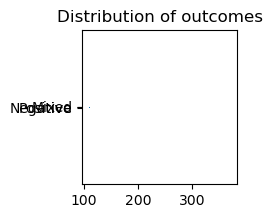

In [263]:
#Whats the distribution of the outcomes ?

outcome_counts = df['Outcome'].value_counts().reset_index()

labels = outcome_counts['Outcome']
count = outcome_counts['count']

# Create in barplot format
plt.figure(figsize=(2,2))
plt.bar(count, labels)
plt.title('Distribution of outcomes')
plt.axis('equal')
plt.show()

In [264]:
# Now filtering to keep historical events only from countries that have made many movies

List_Top_Movie_Prod_Countries = ['USA', 'France', 'Korea', 'South Korea', 'North Korea', 'UK', 'Japan', 'Canada', 'Hong Kong', 'Australia', 'Spain', 'Mexico',
         'Turkey', 'Italy', 'India', 'Ireland', 'Germany', 'Denmark', 'Russia', 'USSR', 'China', 'Finland', 'Thailand', 
         'England', 'Switzerland'] # Make sure to verify if the names match!!!
print(len(List_Top_Movie_Prod_Countries))

print('Shape of the initial dataframe:', df.shape)
df_filtered = df[df['Country'].isin(List_Top_Movie_Prod_Countries)]
print('Shape of the filtered dataframe we obtain:', df_filtered.shape)

25
Shape of the initial dataframe: (669, 11)
Shape of the filtered dataframe we obtain: (344, 11)


In [278]:
print('Number of different countries remaining:', len(df_filtered['Country'].unique()), '-> before was:', len(df['Country'].unique()))
print('Number of different countries remaining:', len(df_filtered['Type of Event'].unique()), '-> before was:', len(df['Type of Event'].unique()))

Number of different countries remaining: 20 -> before was: 103
Number of different countries remaining: 156 -> before was: 262


In [281]:
# Now we will concentrate on the countries where the most amount of events occured

############## CONTINUE HERE 

top_c = 10 # Gets down to France if using 27+
top_e = 20
#Get the top represented country
top_country = df_filtered['Country'].value_counts().head(top_c)
#Get the top represented type of event
top_event = df_filtered['Type of Event'].value_counts().head(top_e)

df_top = df_filtered[df_filtered['Country'].isin(top_country.index)]
df_top = df_top[df_top['Type of Event'].isin(top_event.index)] ### WE MIGHT NEED TO TAKE INTO CONSIDERATION MORE EVENT TYPES !!!

(19, 10)


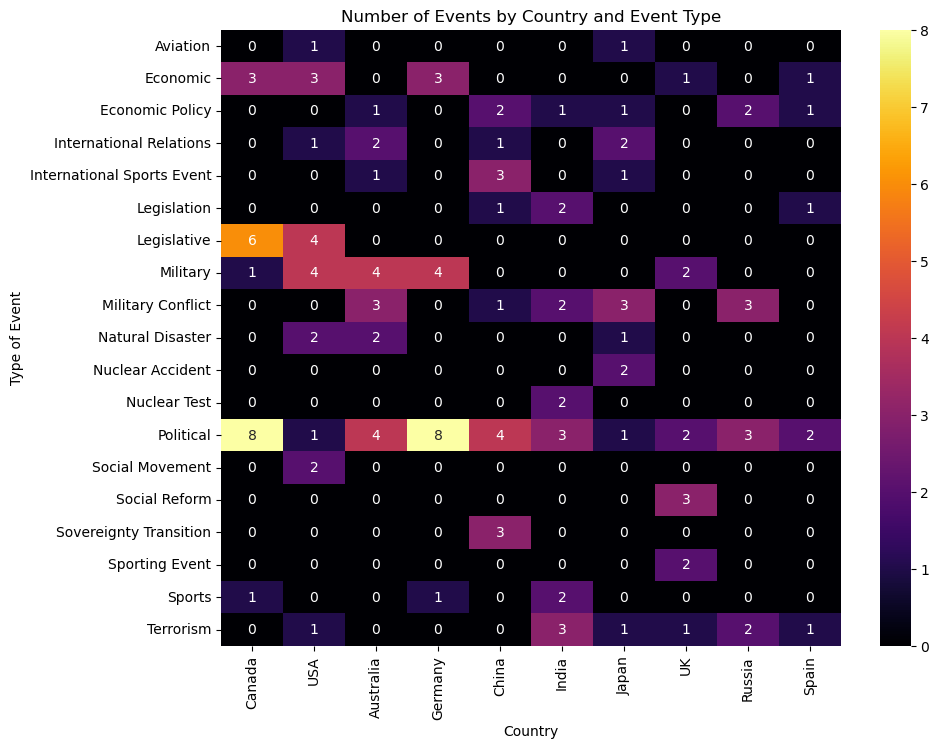

In [282]:
count_country_event = pd.crosstab(df_top['Type of Event'], df_top['Country'])

#mask = count_country_event == 0

# Sum events for each country and sort
sorted_count_country_event = count_country_event.loc[:, count_country_event.sum(axis=0).sort_values(ascending=False).index]

plt.figure(figsize=(10, 8)) #(18, 18)
sns.heatmap(sorted_count_country_event, cbar=True, cmap='inferno', annot=True) # colorblind friendly # , mask=mask
plt.title("Number of Events by Country and Event Type")
#plt.xticks(rotation=45)

print(count_country_event.shape) # There are only sometimes less different types of events than the top few selected 

#IDEA !!! Maybe use word embedding to split the Type of Event into fewer more meaningful categories !!! 

In [300]:
df_top_grouped = df_top.groupby(['Country'])[['Country', 'Outcome']].agg(['count'])
df_top_grouped.head()

,Country,Outcome
,count,count
Country,,
Australia,17,17
Canada,19,19
China,15,15
Germany,16,16
India,15,15


<Axes: xlabel='Country', ylabel='count'>

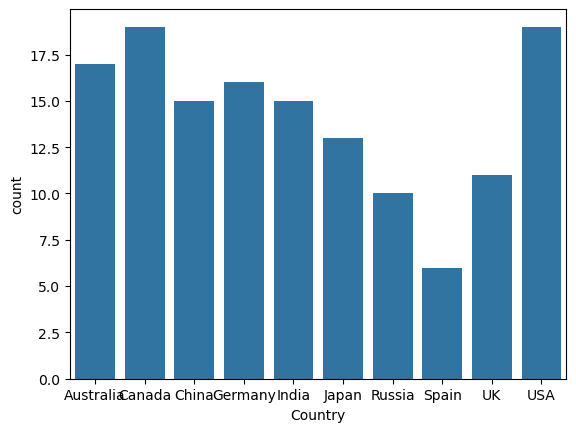

In [298]:

sns.barplot(data=df_top_grouped, x='Country', y='count')

In [247]:
print('Number of events left in the dataframe once having selected the top# countries: ', df_top.shape[0], '(was', df_WorldEvents.shape[0],'at the beginning)')
val2 = 100 * (df_top.shape[0] / df_WorldEvents.shape[0])
print(f"We are using {val2:.2f}% of the full World Events dataframe.")
print('The dataframe has only events from the countries with the most events in the world in the selected time period')

Number of events left in the dataframe once having selected the top# countries:  536 (was 1096 at the beginning)
We are using 48.91% of the full World Events dataframe.
The dataframe has only events from the countries with the most events in the world in the selected time period


In [248]:
df_top

,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
1,Assassination of Empress Myeongseong,8,October,1895,Korea,Political Assassination,Gyeongbokgung Palace,The Japanese-orchestrated assassination height...,"Korean royal family, citizens",Japanese agents,Negative
2,Klondike Gold Rush,,Unknown,1896,Canada,Economic,Yukon,Attracted thousands of prospectors to the Yuko...,"Prospectors, Indigenous peoples",-,Positive
3,Korean Empire Proclaimed,12,October,1897,Korea,Political Change,Korean Peninsula,"King Gojong declared the Korean Empire, assert...",Korean people,Emperor Gojong,Positive
5,Spanish-American War,,April,1898,USA,Military,"Cuba, Philippines",Resulted in U.S. acquiring territories and eme...,"Cubans, Filipinos, Americans",William McKinley,Positive
6,Fall of the Spanish Empire,Unknown,Unknown,1898,Spain,Colonial,"Caribbean, Pacific",Loss of last major overseas colonies; end of S...,"Spanish Empire, colonies",Spanish Government,Negative
...,...,...,...,...,...,...,...,...,...,...,...
662,Nationalization of YPF,16,April,2012,Argentina,Economic,Argentina,Government takeover of YPF from Repsol,Argentinians,Cristina Fernández de Kirchner,Mixed
663,Supreme Court Upholds Obamacare,28,June,2012,USA,Judicial,Washington D.C.,Affirmed the constitutionality of the Affordab...,American citizens,Supreme Court,Positive
664,Costa Concordia Shipwreck,13,January,2012,Italy,Maritime Disaster,Giglio Island,Loss of lives and environmental impact,Cruise passengers and crew,Captain Francesco Schettino,Negative
666,Hurricane Sandy,29,October,2012,USA,Natural Disaster,East Coast,Devastating hurricane causing extensive damage...,East Coast residents,"Local governments, relief efforts",Negative


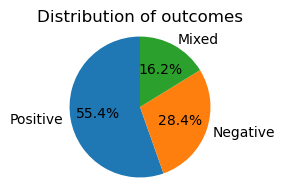

In [249]:
# Whats the distribution of the outcomes in the top# dataframe?

outcome_counts = df_top['Outcome'].value_counts().reset_index()

labels = outcome_counts['Outcome']
count = outcome_counts['count']

# Create the pie chart
plt.figure(figsize=(2,2))
plt.pie(count,labels=labels,
        autopct='%1.1f%%', startangle=90)
plt.title('Distribution of outcomes')
plt.axis('equal')

plt.show()

(27, 3)


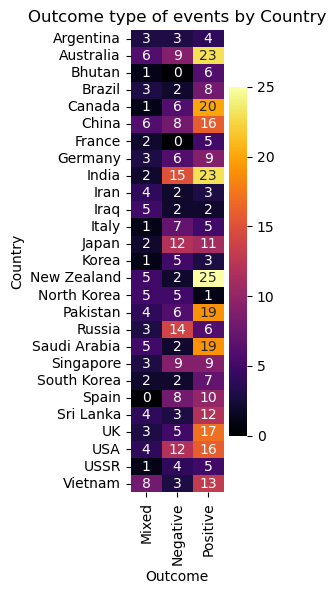

In [250]:
# Outcome type of events by country (feels a bit too subjective and hard to quantify)
### FAIRE AVEC UN BARPLOT POUR QUE CE SOIT PLSU VISIBLE

count_country_event = pd.crosstab( df_top['Country'], df_top['Outcome'])

#mask = count_country_event == 0

plt.figure(figsize=(1.5, 6))
sns.heatmap(count_country_event, cbar=True, cmap='inferno', annot=True) # colorblind friendly # , mask=mask
plt.title("Outcome type of events by Country")
#plt.xticks(rotation=45)

print(count_country_event.shape) # There are only sometimes less different types of events than the top few selected 

In [251]:
# Now keeping historical events only from countries that have made many movies

List_Top_Movie_Prod_Countries = ['USA', 'France', 'Korea', 'South Korea', 'North Korea', 'UK', 'Japan', 'Canada', 'Hong Kong', 'Australia', 'Spain', 'Mexico',
         'Turkey', 'Italy', 'India', 'Ireland', 'Germany', 'Denmark', 'Russia', 'USSR', 'China', 'Finland', 'Thailand', 
         'England', 'Switzerland'] # Make sure to verify if the names match!!!
print(len(List_Top_Movie_Prod_Countries))

print(df_top.shape)
df_top_filtered = df_top[df_top['Country'].isin(List_Top_Movie_Prod_Countries)]
print('Shape of the final filtered dataframe we obtain:', df_top_filtered.shape)

25
(536, 11)
Shape of the final filtered dataframe we obtain: (337, 11)


In [244]:
df_top_filtered.head()

,Name of Incident,Date,Month,Year,Country,Type of Event,Place Name,Impact,Affected Population,Important Person/Group Responsible,Outcome
2,Klondike Gold Rush,,Unknown,1896,Canada,Economic,Yukon,Attracted thousands of prospectors to the Yuko...,"Prospectors, Indigenous peoples",-,Positive
3,Korean Empire Proclaimed,12,October,1897,Korea,Political Change,Korean Peninsula,"King Gojong declared the Korean Empire, assert...",Korean people,Emperor Gojong,Positive
5,Spanish-American War,,April,1898,USA,Military,"Cuba, Philippines",Resulted in U.S. acquiring territories and eme...,"Cubans, Filipinos, Americans",William McKinley,Positive
10,Federation of Australia,1,January,1901,Australia,Political,Entire Australia,Unified the six separate British colonies into...,Residents of the colonies,Edmund Barton,Positive
12,Women's Suffrage Achieved,Unknown,Unknown,1902,Australia,Political,Entire Australia,Granted women the right to vote and stand for ...,Australian women,Women's suffrage activists,Positive
